# 1. How to build gconcord python package

### Step 1: Prepare for the following files:

 - core.cpp, core.h
 - wrap.cpp, wrap.h
 
### Step 2: Run the following command in the terminal to generate a shared library.

In [ ]:
# g++ -fPIC -I/home/jovyan/Supportpkgs/eigen-3.37/ -O0 -g3 -Wall -c -fmessage-length=0 -MMD -MP -MF"build/core.d" -MT"build/core.o" -o "build/core.o" "src/core.cpp"
# g++ -fPIC -I/home/jovyan/Supportpkgs/eigen-3.37/ -I/opt/conda/pkgs/python-3.7.3-h5b0a415_0/include/python3.7m/ -O0 -g3 -Wall -c -fmessage-length=0 -MMD -MP -MF"build/wrap.d" -MT"build/wrap.o" -o "build/wrap.o" "src/wrap.cpp"
# g++ -shared -o "gconcord/sharedlib.so"  build/core.o build/wrap.o
# python setup.py install
# python


Make sure that the header includes:
 #include <Eigen/Core>
 #include <Eigen/Dense>
 #include <Eigen/Sparse>

### Step 3: Write \_\_init\_\_.py file and gconcord.py file

### Step 4: Write setup.py file

### Step 5: Run setup.py file to install the package in the shell: python setup.py install.

### (Optional) Step 6: Pack the files by *zip -r my_arch.zip my_folder* or *tar -cvzf my_arch.tar.gz my_folder*.

In [19]:
import numpy as np
import numpy.ctypeslib as npct
import site
import os.path
import sys
from ctypes import c_int, c_double

lam1 = 0.2
lam2 = 0.1
p = 6

mean = [0 for i in range(p)]
cov = np.diag(np.random.uniform(1, 2, p))
x = np.random.multivariate_normal(mean, cov, 30)

S = np.cov(x, rowvar =  False)

from gconcord import gconcord
omega = gconcord.gconcord(S, lam1, lam2)
omega.round(3)

array([[ 0.633,  0.   ,  0.   , -0.045,  0.   ,  0.   ],
       [ 0.   ,  0.806,  0.   ,  0.   ,  0.   , -0.032],
       [ 0.   ,  0.   ,  0.335,  0.   , -0.039,  0.   ],
       [-0.045,  0.   ,  0.   ,  0.532,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.039,  0.   ,  0.524,  0.   ],
       [ 0.   , -0.032,  0.   ,  0.   ,  0.   ,  0.576]])

In [42]:
import numpy as np
from gconcord import gconcord
x = np.array([[-0.57299987, -1.22881728,  0.24802264,  0.59779037,  0.65240208, 0.89373708],
              [ 0.84087632, -0.3383771 ,  0.0794175 ,  0.12716686, -0.97403288,-0.30804861],
              [ 0.13180135, -0.35350249,  0.01601294,  0.30258641,  0.19927309, 0.95847883],
              [ 0.44658609,  0.12839939, -2.36179304, -3.2224078 , -0.92297796,-1.55831917],
              [-1.00001779, -0.08302829,  0.6814525 ,  0.31812938, -0.50994963,-0.39614266],
              [-0.3653738 , -0.20899641,  0.33488842,  0.93276311,  0.18263188,-1.58771894],
              [ 0.53065032, -0.61604128, -0.67789621,  0.48183976,  0.20767173, 0.20307444],
              [-0.13368724, -0.12181896, -0.52881865, -0.91883273, -0.35672818,-0.09414685],
              [-1.23926047, -0.02615426, -1.02995135, -0.99250009, -0.89672846,-0.54350656],
              [-0.97725987, -0.95743644, -0.47911092, -0.22157924,  1.8751929 , 1.04114063],
              [ 1.4149165 ,  0.93326499, -0.09200369,  0.03342898,  1.71023076, 1.82671778],
              [ 0.19710653, -0.94066402, -1.15043928,  0.88932662,  0.3247554 ,-0.87942537]])   
S = np.cov(x, rowvar =  False)
omega = gconcord.gconcord(S, 0.2, 0.05, method = "coordinatewise")
omega.round(6)

array([[ 1.521808, -0.428711,  0.      ,  0.      ,  0.      ,  0.      ],
       [-0.428711,  3.076337,  0.      ,  0.283426,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  1.774256, -0.670263,  0.      , -0.100538],
       [ 0.      ,  0.283426, -0.670263,  0.956788, -0.094547,  0.      ],
       [ 0.      ,  0.      ,  0.      , -0.094547,  1.294968, -0.536387],
       [ 0.      ,  0.      , -0.100538,  0.      , -0.536387,  1.026582]])

In [43]:
import unittest
ans = np.array([[ 1.521808, -0.428711,  0.000000,  0.000000,  0.000000,  0.000000],
                        [-0.428711,  3.076337,  0.000000,  0.283426,  0.000000,  0.000000],
                        [ 0.000000,  0.000000,  1.774256, -0.670263,  0.000000, -0.100538],
                        [ 0.000000,  0.283426, -0.670263,  0.956788, -0.094547,  0.000000],
                        [ 0.000000,  0.000000,  0.000000, -0.094547,  1.294968, -0.536387],
                        [ 0.000000,  0.000000, -0.100538,  0.000000, -0.536387,  1.026582]])
np.sum(abs(omega.round(6) - ans))

0.0

# 2. Cross validation pipeline

In [21]:
import numpy as np
from gconcord import gconcord
p = 10

mean = [0 for i in range(p)]
cov = 0.5 * np.diag(np.random.uniform(1, 2, p)) + np.ones((p,p)) * 0.5
x = np.random.multivariate_normal(mean, cov, 80)

## 2.1 K-fold cross-validation

In [22]:
## predictive risk
def predrisk(X_test, omega):
    tmp = np.dot( np.dot(X_test, omega), np.diag(1 / np.diag(omega)) )
    return np.linalg.norm(tmp, ord = 'fro') / X_test.shape[0]

In [23]:
def logseq(start, end, length, offset = 0.1):
    import math
    if start != 0:
        offset = 0
    start = start + offset
    end = end + offset
    out = [math.exp(i) for i in np.linspace(math.log(start), math.log(end), length)]
    out = [i - offset for i in out]
    return out

In [24]:
from sklearn.model_selection import KFold
nfold = 3
kf = KFold(n_splits = nfold)
lamset = logseq(0, 1, 10)
cvres = np.zeros((len(lamset), nfold))
j = 0

for train, test in kf.split(x):
    print(j)
    X_train = x[train]
    X_test = x[test]
    S = np.cov(X_train, rowvar =  False)
    for i in range(len(lamset)):
        omega = gconcord.gconcord(S, lamset[i], 0.0, method = "ista")
        cvres[i][j] = predrisk(X_test, omega)
    j = j + 1

0
1
2


In [25]:
cvres.mean(axis = 1)

array([0.58450684, 0.56873472, 0.55950712, 0.55459097, 0.55967282,
       0.58001498, 0.62036526, 0.67776313, 0.70096304, 0.70096304])

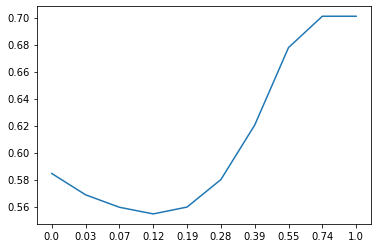

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(len(lamset)), cvres.mean(axis = 1))
plt.xticks(range(len(lamset)), np.round(lamset,2))
plt.show()